In [44]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
df = pd.read_pickle(r'C:\CareerFoundary\Achivement 4.9\data\Prepared Data\combined_data.pkl')

In [5]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,0.0,196.0,1.0,0.0,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,prior,1,2,8,0.0,14084.0,2.0,0.0,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,prior,1,2,8,0.0,12427.0,3.0,0.0,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,prior,1,2,8,0.0,26088.0,4.0,0.0,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,prior,1,2,8,0.0,26405.0,5.0,0.0,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [9]:
print(df.columns)

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_day', 'slowest_day',
       'busiest_period_of_day', 'order_frequency_flag', 'First Name', 'Surnam',
       'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants', 'fam_status',
       'income'],
      dtype='object')


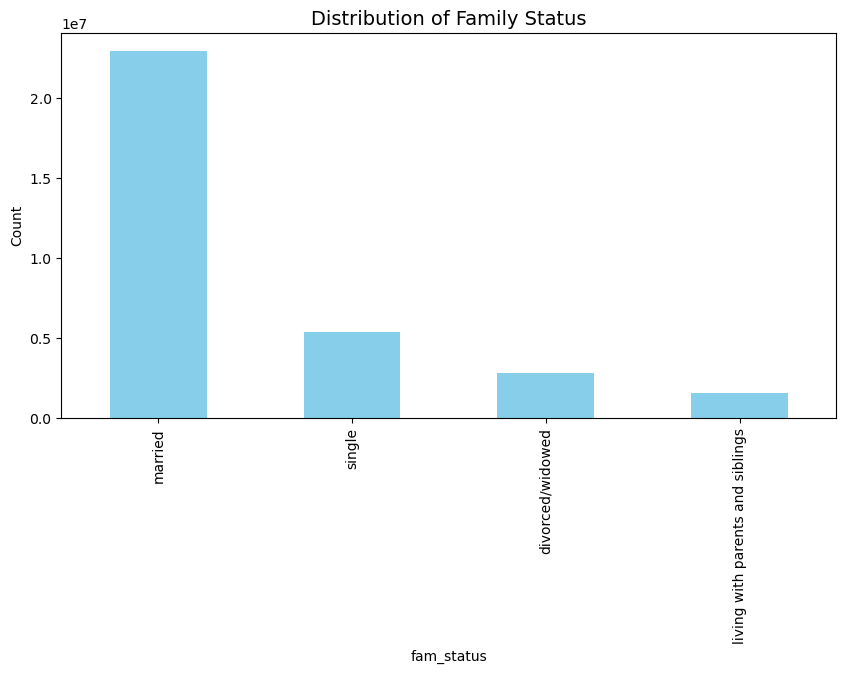

In [11]:
# BAR CHART
plt.figure(figsize=(10,5))

# Create a bar chart for family status
df['fam_status'].value_counts().plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Distribution of Family Status', fontsize=14)
plt.xlabel('fam_status')
plt.ylabel('Count')

# Show the plot
plt.show()

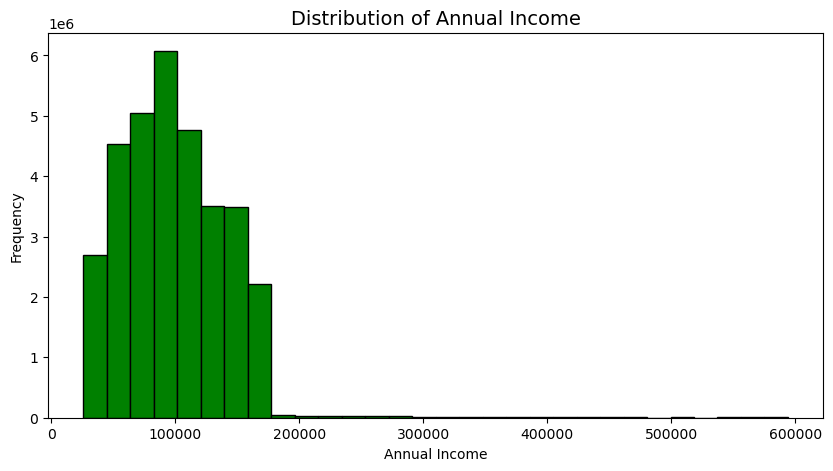

In [24]:
# Histogram
plt.figure(figsize=(10,5))

# Create histogram for annual income
plt.hist(df['income'], bins=30, color='GREEN', edgecolor='black')

# Add title and labels
plt.title('Distribution of Annual Income', fontsize=14)
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

# Show the plot
plt.show()


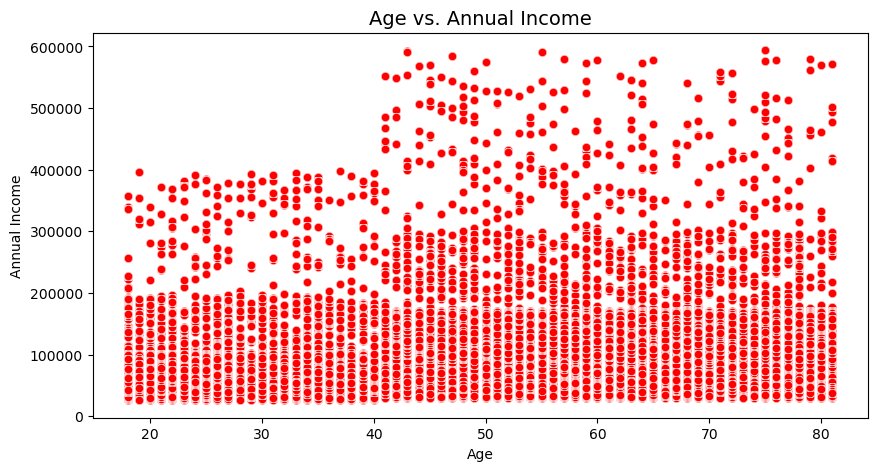

In [21]:
# Scatterplot
plt.figure(figsize=(10,5))

# Create scatterplot
sns.scatterplot(x=df['Age'], y=df['income'], alpha=0.5, color='RED')

# Add title and labels
plt.title('Age vs. Annual Income', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Annual Income')

# Show the plot
plt.show()


In [26]:
df.rename(columns={'n_dependants': 'num_dependents'}, inplace=True)

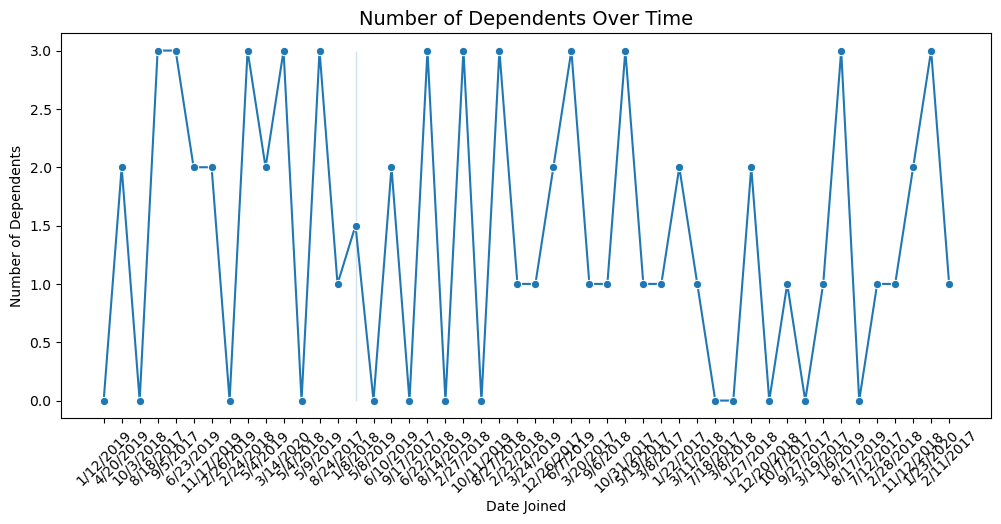

In [32]:
# LINE CHART
df_sample = df.sample(n=50, random_state=42)

# Set figure size
plt.figure(figsize=(12,5))

# Create line plot
sns.lineplot(data=df_sample, x='date_joined', y='num_dependents', marker='o')

# Add title and labels
plt.title('Number of Dependents Over Time', fontsize=14)
plt.xlabel('Date Joined')
plt.ylabel('Number of Dependents')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

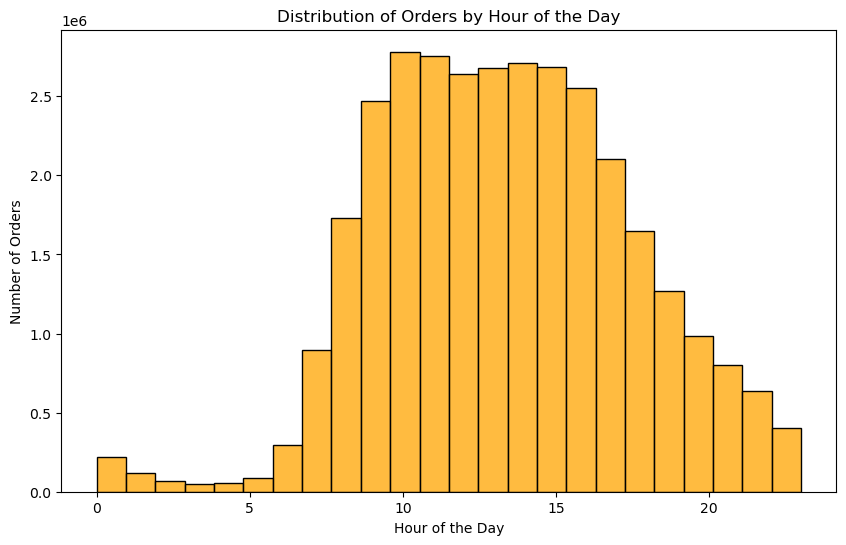

In [36]:
plt.figure(figsize=(10,6))

# Create histogram
sns.histplot(df['order_hour_of_day'], bins=24, kde=False, color='ORANGE')

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Hour of the Day')

# Show plot
plt.show()

In [40]:
df['loyalty_flag'] = df.groupby('user_id')['order_number'].transform(
    lambda x: 'Loyal Customer' if x.max() > 40 else ('Regular Customer' if x.max() > 10 else 'New Customer')
)

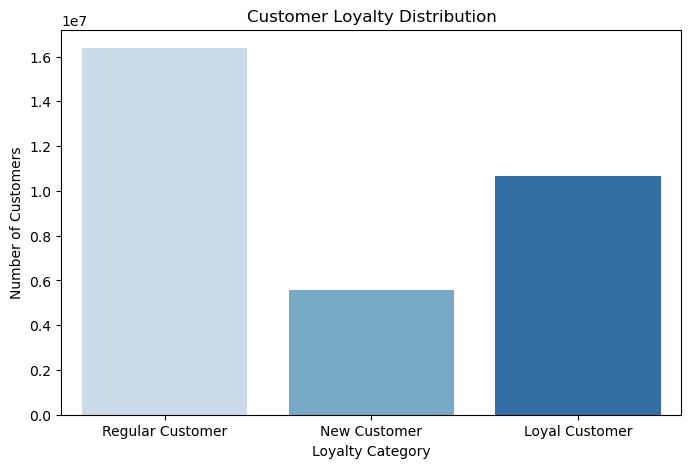

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(8, 5))

# Corrected countplot without warning
sns.countplot(x='loyalty_flag', data=df, palette='Blues', hue='loyalty_flag')

# Add titles and labels
plt.title('Customer Loyalty Distribution')
plt.xlabel('Loyalty Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Show the plot
plt.show()


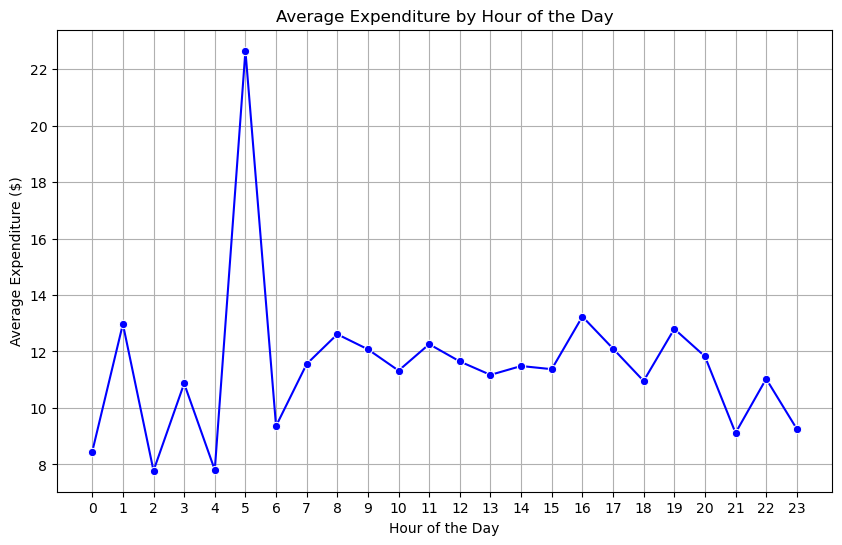

In [53]:
# Sample the data (let's take a 10% sample to keep it manageable)
sampled_df = df.sample(frac=0.1, random_state=42)

# Group by order_hour_of_day and calculate the mean of prices
hourly_expenditure = sampled_df.groupby('order_hour_of_day')['prices'].mean().reset_index()

# Create a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_hour_of_day', y='prices', data=hourly_expenditure, marker='o', color='blue')

# Add titles and labels
plt.title('Average Expenditure by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Expenditure ($)')
plt.xticks(range(0, 24))  # Set x-axis to show hours from 0 to 23
plt.grid(True)

# Show the plot
plt.show()

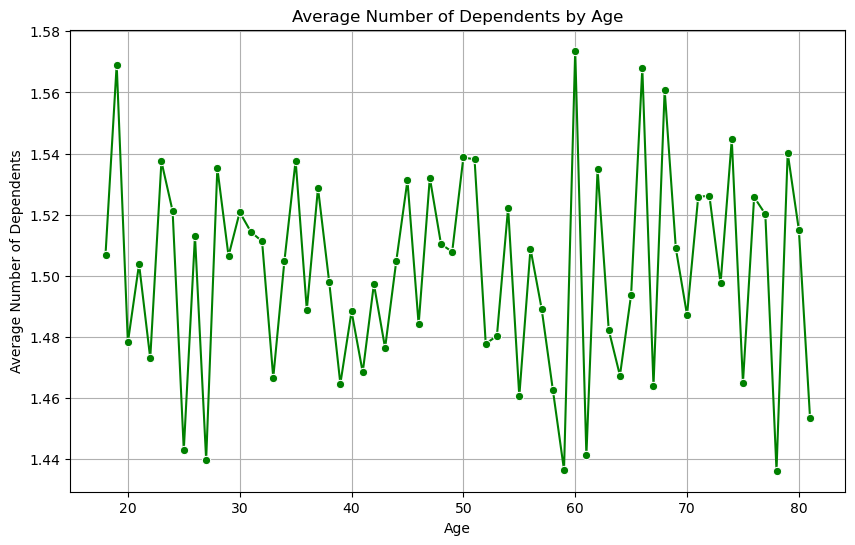

In [63]:
# Group by Age and calculate the average number of dependents
age_dependents = df.groupby('Age')['num_dependents'].mean().reset_index()

# Create a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='num_dependents', data=age_dependents, marker='o', color='green')

# Add titles and labels
plt.title('Average Number of Dependents by Age')
plt.xlabel('Age')
plt.ylabel('Average Number of Dependents')
plt.grid(True)

# Show the plot
plt.show()


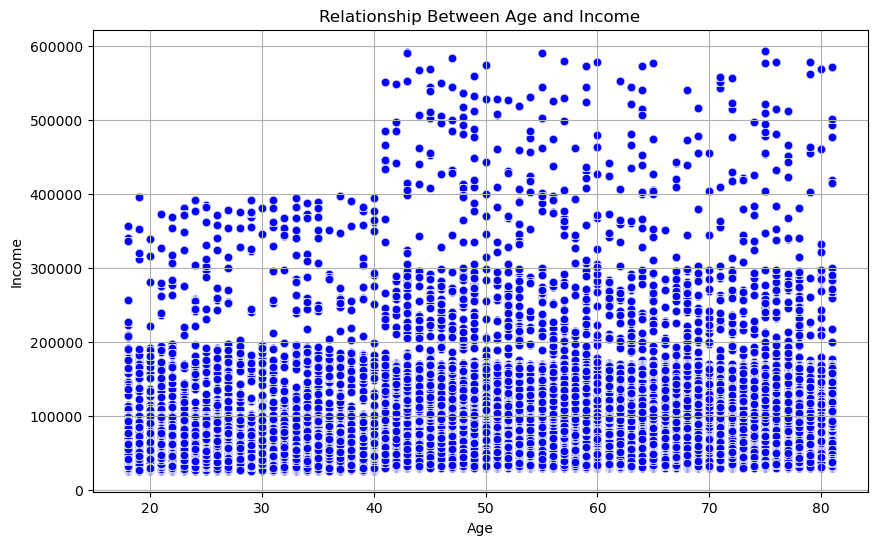

In [65]:
# Create a scatterplot to show the relationship between age and income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='income', data=df, color='blue', alpha=0.6)

# Add titles and labels
plt.title('Relationship Between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)

# Show the plot
plt.show()

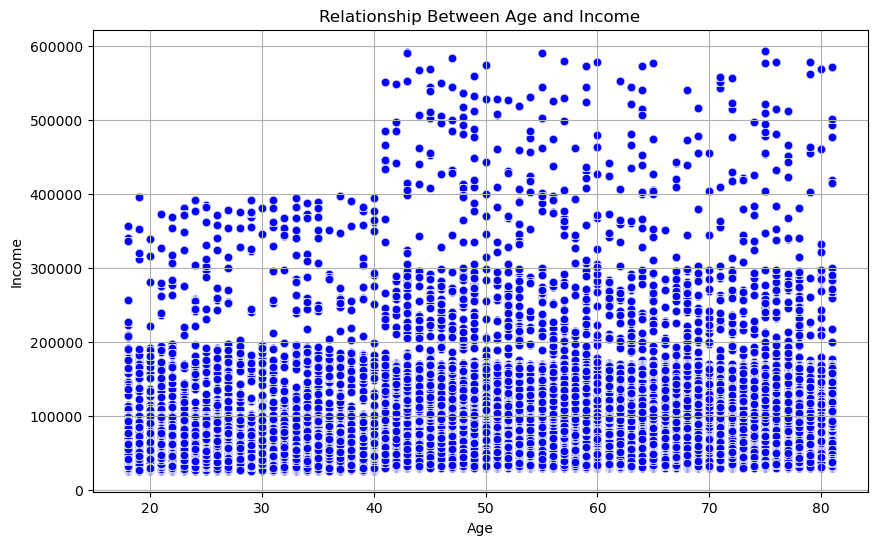

In [71]:
# Save the scatterplot as a .png file
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='income', data=df, color='blue', alpha=0.6)

# Add titles and labels
plt.title('Relationship Between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)

# Save the plot to a .png file
plt.savefig(r'C:\CareerFoundary\Achivement 4.9\data\Prepared Data\age_vs_income.png')


# Show the plot
plt.show()